Importamos primero los paquetes necesarios y los datos a usar:

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

A=pd.read_excel('1.xlsx',usecols=np.arange(1,16))
A.head()

,FL,APP,AA,LA,SC,LC,HON,SMS,EXP,DRV,AMB,GSP,POT,KJ,SUIT
0,6,7,2,5,8,7,8,8,3,8,9,7,5,7,10
1,9,10,5,8,10,9,9,10,5,9,9,8,8,8,10
2,7,8,3,6,9,8,9,7,4,9,9,8,6,8,10
3,5,6,8,5,6,5,9,2,8,4,5,8,7,6,5
4,6,8,8,8,4,4,9,5,8,5,5,8,8,7,7


**1a) Obtenga las matrices de correlación y de covarianza $R$ y $S$ respectivamente para esos datos.**

Obtengamos primero la matriz de covarianza, $S$, para ello primero normalizamos los datos:

In [2]:
datos_n=A.values
datos=StandardScaler().fit_transform(datos_n.astype(float))
S=np.cov(datos.T)
print(S)

[[ 1.0212766   0.24388671  0.04497793  0.31283034  0.09410518  0.2332923
  -0.11843422  0.27645875  0.56004728  0.35292902  0.29070112  0.34539775
   0.37527107  0.47714675  0.59838456]
 [ 0.24388671  1.0212766   0.12604524  0.38769105  0.43993473  0.37915807
   0.35233621  0.49996496  0.14392332  0.347795    0.56133033  0.51707097
   0.5181722   0.29013732  0.39238301]
 [ 0.04497793  0.12604524  1.0212766   0.00162359  0.00113031  0.07845906
  -0.04536294  0.05589183  0.2712361   0.09551186  0.04500356  0.20170678
   0.29620305 -0.33019849  0.14299646]
 [ 0.31283034  0.38769105  0.00162359  1.0212766   0.30887478  0.49304673
   0.66641131  0.36933843  0.14371753  0.40152934  0.35392855  0.51350738
   0.61839069  0.69973355  0.33391396]
 [ 0.09410518  0.43993473  0.00113031  0.30887478  1.0212766   0.82472683
   0.41537912  0.81664395  0.01544766  0.71932603  0.86003972  0.73645172
   0.68611531  0.49272098  0.2556086 ]
 [ 0.2332923   0.37915807  0.07845906  0.49304673  0.82472683  1.0

Obtengamos ahora la matriz de correlación, $R$:

In [3]:
R=np.corrcoef(datos.T)
print(R)

[[ 1.          0.23880573  0.04404089  0.30631304  0.09214466  0.22843205
  -0.11596684  0.27069919  0.54837963  0.34557633  0.28464484  0.33820196
   0.36745292  0.46720619  0.58591822]
 [ 0.23880573  1.          0.1234193   0.37961415  0.43076943  0.37125894
   0.34499587  0.48954902  0.14092491  0.34054927  0.54963595  0.50629865
   0.50737694  0.28409279  0.38420837]
 [ 0.04404089  0.1234193   1.          0.00158977  0.00110676  0.07682449
  -0.04441788  0.05472742  0.26558535  0.09352203  0.04406598  0.19750455
   0.29003215 -0.32331935  0.14001737]
 [ 0.30631304  0.37961415  0.00158977  1.          0.30243989  0.48277493
   0.65252774  0.36164388  0.14072342  0.39316415  0.34655503  0.5028093
   0.60550755  0.68515577  0.32695742]
 [ 0.09214466  0.43076943  0.00110676  0.30243989  1.          0.80754502
   0.40672539  0.79963054  0.01512583  0.70434007  0.84212223  0.72110897
   0.67182124  0.48245596  0.25028342]
 [ 0.22843205  0.37125894  0.07682449  0.48277493  0.80754502  1.


**1b) Escoja una de las matrices $S$ o $R$ (Justifique su elección). Y determine los eigenvalores y eigenvectores, construya un gráfico mostrando, en orden descendente por tamaño, el porcentaje que cada eigenvalor contribuye a la varianza total de la muestra.**

Dado que las varianzas son similares y los criterios se manejan con la misma escala, escogemos $S$ para el análisis. Determinemos entonces los autovalores y autovectores de $S$:

In [4]:
vals,vecs=la.eig(S)
print("Autovalores:")
for i in range(len(vals)):
    print(vals[i])

Autovalores:
7.669204410540634
2.118022368067411
1.4940700122310993
1.2147769385589198
0.7555933994056876
0.5040086103412464
0.3612652729242787
0.31213881959575224
0.2544007560723308
0.18884397082794757
0.1559524363841073
0.0356316127406191
0.06629102659405652
0.09950442906325646
0.08944487282287632


In [5]:
print("Autovectores:")
for i in range(len(vecs)):
    print(vecs[i])

Autovectores:
[ 0.16239586 -0.42321851 -0.32233485 -0.09617302 -0.11469123 -0.6258131
  0.19601527  0.09513091 -0.4075533  -0.04412954  0.119711    0.02051505
  0.09643737  0.18648551  0.04712726]
[ 0.21300212  0.03318149  0.02466438  0.26077833 -0.87164764  0.0462504
 -0.01135912  0.00650548  0.05900607 -0.01471572 -0.11528805 -0.01608695
 -0.09280724  0.02242286 -0.3105978 ]
[ 0.03985945 -0.24114419  0.42014195  0.64396544  0.21185423 -0.21398057
  0.31025646 -0.04807933  0.08314043 -0.28680959 -0.18540401 -0.06845411
 -0.00932365 -0.17510955  0.02874706]
[ 0.22527736  0.13721829 -0.4638137   0.34758742  0.12182865 -0.10539132
 -0.15295677 -0.26246291  0.39683864 -0.16035215  0.41706836  0.30328794
  0.14869882 -0.02303346 -0.06696114]
[ 0.29058397  0.24302309  0.24745674 -0.17353611 -0.00393878 -0.02575334
  0.15307534  0.36805113 -0.16483565 -0.24772401  0.42026794  0.30417165
 -0.37093187 -0.33209682  0.00405065]
[ 0.31490085  0.12633619  0.15448533 -0.07133782  0.20487546 -0.1869

Construyamos ahora el gráfico pedido:

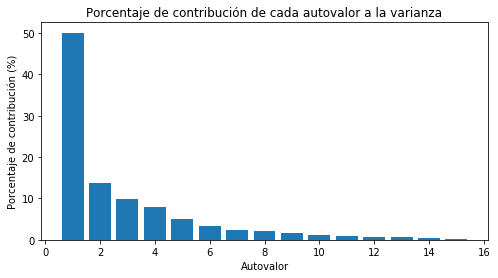

In [6]:
vals[::-1].sort()
per=np.zeros(len(vals))
for i in range(len(vals)):
    per[i]=vals[i]/vals.sum()*100
    
plt.figure(figsize=(8,4))
plt.bar(range(1,len(vals)+1), per, align='center')
plt.title('Porcentaje de contribución de cada autovalor a la varianza')
plt.ylabel('Porcentaje de contribución (%)')
plt.xlabel('Autovalor')
plt.show()

**1c) ¿Cuál es la varianza y media de la primera componente?**

La varianza de la primera componente es:

In [7]:
np.var(vecs[0])

0.06118972613854579

La media de la primera componente es:

In [8]:
np.mean(vecs[0])

-0.07400635464688758

**1d) Suponga que se van a contratar personas provenientes del conjunto de datos solicitantes. ¿Cuáles están por debajo del promedio con respecto a la primera, a las dos primeras componentes, a las tres primeras componentes principales?**

Veamos cual es la identificación de cada individuo cuyo promedio está por debajo con respecto a la primera componente:

In [9]:
prom=[]
for i in range(len(datos)):
    if np.mean(vecs[0])>=np.mean(datos[i]):
        prom.append(i+1)
prom

[15, 18, 19, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 47, 48]

Veamos ahora cual es la identificación de cada individuo cuyo promedio está por debajo con respecto a las dos primeras componentes:

In [10]:
prom=[]
for i in range(len(datos)):
    if (np.mean(vecs[0])>=np.mean(datos[i]) and np.mean(vecs[1])>=np.mean(datos[i])):
        prom.append(i+1)
prom

[15, 18, 19, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 47, 48]

Finalmente, veamos cual es la identificación de cada individuo cuyo promedio está por debajo con respecto a las tres primeras componentes:

In [11]:
prom=[]
for i in range(len(datos)):
    if (np.mean(vecs[0])>=np.mean(datos[i]) and np.mean(vecs[1])>=np.mean(datos[i]) and 
        np.mean(vecs[2])>=np.mean(datos[i])):
        prom.append(i+1)
prom

[15, 18, 19, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 47, 48]

**2a) Obtenga la matriz de correlación $R$ de la muestra para esos datos, y determine sus eigenvalores y sus eigenvectores.**

Leemos primero los datos:

In [12]:
B=pd.read_excel('2.xlsx')
B.head()

,Países,100 m,200 m,400 m,800 m,1500 m,5000 m,10000 m,Marathon
0,Argentina,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.72
1,Australia,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
2,Austria,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
3,Belgica,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
4,Bermudas,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.62


Determinemos ahora la matriz de correlación:

In [13]:
d=B.values
R=np.corrcoef(d[:,1:].astype(float).T)
print(R)

[[1.         0.92263844 0.84114677 0.75602776 0.12498532 0.61946177
  0.63089377 0.55950229]
 [0.92263844 1.         0.85072702 0.80662654 0.17402707 0.69537702
  0.69536429 0.58970133]
 [0.84114677 0.85072702 1.         0.8701714  0.20645296 0.77861385
  0.78651373 0.69501385]
 [0.75602776 0.80662654 0.8701714  1.         0.21099058 0.86359388
  0.86793063 0.75687641]
 [0.12498532 0.17402707 0.20645296 0.21099058 1.         0.26303459
  0.27417765 0.25228914]
 [0.61946177 0.69537702 0.77861385 0.86359388 0.26303459 1.
  0.97442035 0.87461526]
 [0.63089377 0.69536429 0.78651373 0.86793063 0.27417765 0.97442035
  1.         0.9040155 ]
 [0.55950229 0.58970133 0.69501385 0.75687641 0.25228914 0.87461526
  0.9040155  1.        ]]


Determinemos ahora los autovalores y autovectores de $R$:

In [14]:
vals,vecs=la.eig(R)
print("Autovalores:")
vals[::-1].sort()
for i in range(len(vals)):
    print(vals[i])

Autovalores:
5.746535160498793
1.0020120189700654
0.7436016165160104
0.19183996105565299
0.13594511632050468
0.0947916086605717
0.0627283390672644
0.022546178911133016


In [15]:
print("Autovectores:")
for i in range(len(vecs)):
    print(vecs[i])

Autovectores:
[ 0.34912525  0.32880184 -0.42473065 -0.39188489 -0.03406912  0.65175132
  0.10011393 -0.00822983]
[ 0.36581097  0.25938153 -0.37546072 -0.15838929  0.03779898 -0.65698583
 -0.08658837 -0.43850763]
[ 0.38467565  0.14515716 -0.17287029  0.30262405 -0.00497629 -0.14117447
 -0.3893589   0.73343933]
[ 0.39203007  0.05335375  0.03855679  0.58278941 -0.03149771  0.02795113
  0.70417466 -0.06855912]
[ 0.11964022 -0.84756367 -0.51580196 -0.00201812 -0.00963984  0.02161056
  0.02646899  0.00239962]
[ 0.38599936 -0.14362426  0.32206022  0.13937686 -0.62725933  0.18457351
 -0.40544439 -0.33958957]
[ 0.38959287 -0.15390959  0.32267949  0.0343981   0.76695315  0.1748887
 -0.24372534 -0.20253078]
[ 0.35712612 -0.19496944  0.41637225 -0.60786597 -0.12095183 -0.2403287
  0.33245985  0.3296425 ]


**2b) Determina las 2 primeras componentes principales para las variables normalizadas. Prepare una tabla mostrando las correlaciones de las variables normalizadas, con las componentes y el porcentaje acumulado del total de varianza de la muestra (normalizada) expresada por las 2 componentes.**

Las dos componentes principales vendrán dadas por:
$$z_1=0.349y_1+0.329y_2-0.425y_3-0.392y_4-0.034y_5+0.652y_6+0.100y_7-0.008y_8$$
$$z_2=0.366y_1+0.259y_2-0.375y_3-0.158y_4+0.038y_5-0.657y_6-0.087y_7-0.438y_8$$

Donde, $y_1$: registro 100m, $y_2$: registro 200m, $y_3$: registro 400m, $y_4$: registro 800m, $y_5$: registro 1500m, $y_6$: registro 5000m, $y_7$: registro 10000m y $y_8$: registro maratón.

Las correlaciones de las variables normalizadas son las mismas que mostradas en la matriz de correlación, así que determinemos el porcentaje acumulado del total de la varianza de la muestra (normalizada) expresada por las 2 componentes:

In [16]:
(vals[0]+vals[1])/vals.sum()*100

84.35683974336078

**2c) Interprete las 2 componente principales obtenidas en la parte b.**

La primera componente principal explica mejor los registros de 200m, 400m, 800m y 10000m; mientras que la segunda componente principal explica mejor los restantes.

**2d) Clasifique las naciones basadas en su puntaje en la primera componente principal. ¿Esta clasificación corresponde con su noción intuitiva de la excelencia atlética para los diferentes países?**

Tomando los datos normalizados, encontramos la puntuación para cada país y ordenamos la clasificación:

In [17]:
datos=StandardScaler().fit_transform(d[:,1:].astype(float))
points=np.zeros(len(datos))
Pos=np.copy(points)
tab=[]
Pais=[]
for i in range(len(datos)):
    points[i]=np.dot(datos[i],vecs[0])
pos=np.argsort(points)
for i in range(54,-1,-1):
    Pos[54-i]=pos[i]
for i in range(len(Pos)):
    Pais.append(d[Pos[i].astype(int),0])
points[::-1].sort()
for i in range(len(points)):
     tab.append([Pais[i],points[i]])
TAB=pd.DataFrame(np.array(tab),index=np.arange(1,56),columns=['País','Puntaje'])
TAB.head()

,País,Puntaje
1,Islas Cook,2.1880599486871826
2,Mauritius,1.7186163119887983
3,Filipinas,1.4355996604166714
4,Western Samoa,0.9149233700552284
5,India,0.724677143560264


Dicha clasificación no corresponde con la noción intuitiva de la excelencia atlética para los países participantes.

**3a) Calcular la distancia chi-cuadrado entre las marcas.**

Leemos primero los datos

In [18]:
C=pd.read_excel('3.xlsx')
C.head()

,imagen,marca,frec
0,engorda,AA,82
1,hombres,AA,96
2,SudAustraliano,AA,72
3,tradicional,AA,101
4,superior,AA,66


Armemos la tabla de contigencia para la información dada:

In [19]:
tab=C.values
imagen=tab[:23,0]
marcas=np.array(['AA','BB','CC','DD','EE','FF'])
AA=tab[:23,2]
BB=tab[23:46,2]
CC=tab[46:69,2]
DD=tab[69:92,2]
EE=tab[92:115,2]
FF=tab[115:,2]
values=np.array([AA,BB,CC,DD,EE,FF]).T
pd.DataFrame(values,columns=marcas,index=imagen)

,AA,BB,CC,DD,EE,FF
engorda,82,78,12,16,76,110
hombres,96,9,0,3,119,11
SudAustraliano,72,111,30,13,20,22
tradicional,101,30,1,0,1,53
superior,66,24,14,7,9,76
sano,6,6,137,93,3,4
cafeína,47,33,14,15,65,43
nuevo,1,11,78,99,15,15
atractivo,16,9,69,55,10,31
duro,60,7,1,2,107,5


Para calcular la distancia entre las marcas primero encontramos los elementos de la matriz de correspondencia así como las sumas marginales de cada fila y columna:

In [20]:
P=(values.copy()).astype(float)
for i in range(23):
    for j in range(6):
        P[i,j]=values[i,j]/tab[:,2].sum()
r=[]
for i in range(len(P)): 
    r.append(P[i].sum())
r=np.array(r)

c_=[]
for i in range(6): 
    c_.append(P[:,i].sum())
c_=np.array(c_)

Construyamos ahora una matriz que contiene las distancias chi cuadrado entre cada marca:

In [21]:
D=np.zeros((6,6))
for i in range(6):
    for j in range(6):
        suma=0
        for k in range(23):
            suma+=(P[k,i]-P[k,j])**2/r[k]
        D[i,j]=np.sqrt(suma)
pd.DataFrame(D,index=marcas,columns=marcas)

,AA,BB,CC,DD,EE,FF
AA,0.000000,0.196946,0.337148,0.312065,0.178636,0.199622
BB,0.196946,0.000000,0.254714,0.218711,0.194265,0.145620
CC,0.337148,0.254714,0.000000,0.087750,0.307928,0.275489
DD,0.312065,0.218711,0.087750,0.000000,0.268510,0.240111
EE,0.178636,0.194265,0.307928,0.268510,0.000000,0.214210
FF,0.199622,0.145620,0.275489,0.240111,0.214210,0.000000


**3b) Realice una prueba chi-cuadrado para determinar si hay dependencia entre la variable fila y la variable columna.**

Encontremos primero el estadístico:

In [22]:
chi=0
for i in range(23):
    for j in range(6):
        chi+=(P[i,j]-r[i]*c_[j])**2/r[i]*c_[j]
chi=chi*4662
chi

110.81048387710872

Teniendo en cuenta 110 grados de libertad, encontramos ahora el valor $P$:

In [23]:
1-stats.chi2.cdf(chi,110)

0.46039134019670336

Se puede afirmar entonces que hay cierta independencia entre la marca e imagen del producto.

**3c) ¿Qué se denomina inercia total de los datos? Calcular la inercia total de la tabla.**

La inercia total se le denomina al promedio ponderado (ponderado por la suma marginal de la fila) de las distancias chi cuadrado entre los perfiles de fila y su media. La inercia total en este caso vendría dada por:

In [24]:
chi/4662

0.023768872560512383